# Application of Unsupervised Learning technique Principal Component Analysis (PCA) in Anomaly Detection  
JF Schultz, MSDS Candidate - Univ Colorado at Boulder, Nov 2023  

GitHub Repository:  https://github.com/miniwheat/pca-anomaly-detection

[Introduction](#introduction)  
[Summary](#summary)  
[Exploratory Data Analysis and Visualizations](#exploratory-data-analysis)  
[Anomaly Detection with PCA](#anomaly-detection-with-pca)  
[Comparison with other Unsupervised Learning techniques and Supervised Learning](#comparison-with-other-unsupervised-learning-techniques)  
[Conclusion and Discussion](#conclusion-and-discussion)

# Introduction  

This project demonstrates the application of an Unsupervised Learning technique, Principal Component Analysis (PCA) in anomaly detection.  Anomaly detection is a generalized task of identifying outlying observations or entities in case specific applicatons and areas such as preventive maintenance or failure prediction in mechanical systems, cybersecurity, financial transactions, and others.  Anomaly detection can be accomplished by a number techniques including statistical analysis, Supervised Machine Learning, or Unsupervised Machine Learning, typically with the most applicable technique being dependent on the case specific task.  

Here, Principal Componenent Analysis (PCA) was applied as an Unsupervised Learning technique in the identification of fraudulent credit card transactions.  The dataset used was collected by Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) and is readily available from kaggle at [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).  The dataset provides classification labels for each observation (transaction).  The data were purposely analyzed without the classfication labels as an Unsupervised Learning technique.  The classification labels provide ground truth labels for performance assessment but not as part of the Machine Learning process, i.e. an Unsupervised technique.

# Summary  

**Exploratory Data Analysis** was performed and showed no issues with missing data, bad data, outliers, encoding issues, or other concerns.  Data Visualization was performed to demonstrate the target class imbalance, correlation among variables, distribution and trends over time of transactions, and potential separability of classes by principal component analysis.  

**Technique.** Principal Component Analysis (PCA) technique was utilized to perform anomaly detection and unsupervised classification.  In general, PCA attempts to capture as much information as possible from the original features, in reduced dimension represented in the principal components.  For example,  the principal components of facial images can be used to construct images (appropriately referred to as 'eigenfaces') which are recognizable as faces but are sometimes eerily distorted depending on then number of principal components used.  Since the principal components are derived from the total dataset, when the dataset is reconstructed on an inverse transformation from the principal components, individual observations which differ the most from the whole data will have the greatest error in comparison between the reconstructed and original values.

The credit card transaction data was standardized and scaled across features and PCA was performed.  The principal components were then used to produce an inverse transformed dataset.  Individual observations were scored over the range [0, 1] using a loss function defined as the sum of squared differences between reconstructed and individual values, standardized to the range [0, 1] in relation to the entire range of sum of squared differences.  Thus, each observation is given an anomaly score where closer to 0 is more likely normal/valid, and closer to 1 is more likely anomalous/fraudulent.  

**Prediction.** Anomaly scores can then be used to classify each observation according to a specified score threshold.  The anomaly scores and entire range of threshold values were used to produce Receiver-Operator Curves and Precision-Recall Curves to demonstrate the importance of an appropriate threshold selection, to perform experiments to determine the optimal number of principal components, and to select proposed threshold levels.  Various threshold levels were selected, classification was performed and assessed with comparison to the known ground truth labels.  Results are demonstrated in traditional confusion matrix format with appropriate metrics.  The confusion matrices and associated assessment metrics demonstrate the impact of threshold level on the practical implications of implementation in anomaly detection.

**Performance Analysis.** Performance of the PCA technique in anomaly detection was compared with other Unsupervised Learning models including Isolation Forest, Local Outlier Factor, and One Class SVM (Support Vector Machine).  This task was specifically constructed as Unsupervised Learning task and more realistically represents a real-time application where classification is not known.  Performance was also compared with a Supervised Learning technique, Random Forest.

**Results.**  A model using 27 PCA components was selected.  It's precision, recall, and F-score metrics were analyzed for various anomaly score thresholds, showing best performance at the cutoff value = 0.05 with the following metrics:  F-1=0.76, F-beta(2)=0.74, precision=0.59, recall=0.47.  Of the more than 284,000 transactions, this model correctly identified 47.5% (n=234) of the fraudulent transactions with only 159 valid transactions mislabeled as fraudulent.  Overall, the metrics results demonstrate good performance.  The F-Score is situation dependent i.e. task specific, however an F-Score > 0.7 is generally considered good. The functional performance is rather impressive in the bigger picture of the volume of transactions, and that the number of valid transactions dwarfs the number of fraudulent transactions on the order of $10^3$ to $1$.  

**Technique Comparison.**  The PCA application in anomaly detection was compared with other Unsupervised (and Supervised) Learning techniques.  It performed better than the other Unsupervised techniques tested:  Isolation Forest (F1-Score=0.58), Local Outlier Factor (F1-Score=0.48), and OneClassSVM (F1-Score=0.59).  One Supervised technique was tested, Random Forest.  Random Forest performed better than the Unsupervised PCA technique (RF F1-Score=0.82).  However, the Random Forest performance was not extraordinarily better than the Unsupervised technique (with the caveat and understand that the RF model was not tuned/optimized, and RF was the only Supervised model tested for simple comparison).

**Conclusion and Discussion.**  The PCA analysis technique performed better than the other Unsupervised techniques tested.  While, Random Forest performed better, its performance was not extraordinarily better, and has the advantage of model training with knowledge of the class designations.  

This technique of PCA Analysis for Anomaly Detection shows significant potential in this task specific application, and may also be beneficial in other same domain applications or other domains.  There are multiple different potential implementations which may also improve performance, such as online/offline analysis, initial testing, second layer testing with additional techniques, and analysis on the underlying data (which was not available here).



# Exploratory Data Analysis

In [124]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, roc_auc_score, confusion_matrix, classification_report

In [2]:
# import data
df = pd.read_csv('data/creditcard.csv')

**Dataset Information**  

The dataset is available from kaggle at [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).  

The dataset is comprised of credit card transactions made by European cardholders in 2013 over the course of two days.  The meaning and definition of the actual recorded information and variables is not known.  As noted, "Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'."

In [5]:
# basic info
print('dataset shape: ', df.shape)
print()
print('variables: ', *list(df.columns))

dataset shape:  (284807, 31)

variables:  Time V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21 V22 V23 V24 V25 V26 V27 V28 Amount Class


In [16]:
# Data Cleaning

df.info()        # dtypes: float64(30), int64(1)
df.isna().sum()  # 0
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Exploratory Data Analysis** was performed.  The dataset was examined for missing values, bad values, duplicates, and improperly encoded data.  
There dataset contains a target class encoded as [0,1] int, 29 numeric variables encoded as float, and a 'time' variable encoded as float (which is simply constant 1 second increments between observations).  Preliminary Data Exploration shows no missing or apparent bad values.  The well prepared and clean data is expected given its source and preparation prior to being made available via kaggle.  The original raw data is proprietary and is commercially and/or confidentially protected, and not available.  

A typical Data Cleaning and Preparation should include certain tasks such as:  examination for missing or bad values, duplicate values, miscoded values i.e. mixed or improper data types such as numeric values encoded as strings.  Depending on the amount of missing or bad values, the amount of data available, and the nature of the data, one must decide how to handle missing or bad values.  Typical options include omitting observations or imputation of values.  Imputation has additional method considerations such imputation from mean, forward/backfilling, interpolation, or other estimation methods.  

Although the dataset is already well prepared and no significant data wrangling was required, a complete Data Exploration was performed.  

As part of Exploratory Data Analysis, **Target Class Distribution** is shown below.

Class Distribution:
Not Fraud    284315
Fraud           492
Name: Class, dtype: int64

0.17% of the data is fraudulent


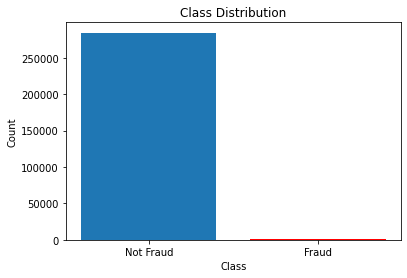

In [15]:
# Class Distribution

counts = df.Class.value_counts()
counts.index = ['Not Fraud', 'Fraud']
print('Class Distribution:')
print(counts)
print()
print(f'{counts[1]/counts[0]:0.2%} of the data is fraudulent')


fig, ax = plt.subplots()
plt.bar(counts.index, counts.values, color=['tab:blue', 'red'])
plt.xticks([0,1])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution');

Analysis of the target / class distribution shows an *extremely* unbalanced distribution with only 0.17% of the transactions as fraudulent.  

The dataset was examined for variable **feature correlation** as shown below.  As expected, with the exception of 'Time' and 'Amount' there was no significant correlation among variable features.  As previously mentioned, the underlying original variables are protected proprietary information.  The actual number and character of the underlying variables are not known, and the 28 variables provided in the dataset are the principal components of the underlying raw data, essentially representing disguised data.  As expected, there should not be any significant correlation among the 28 variable features as they represent principal components which by nature should not be correlated.

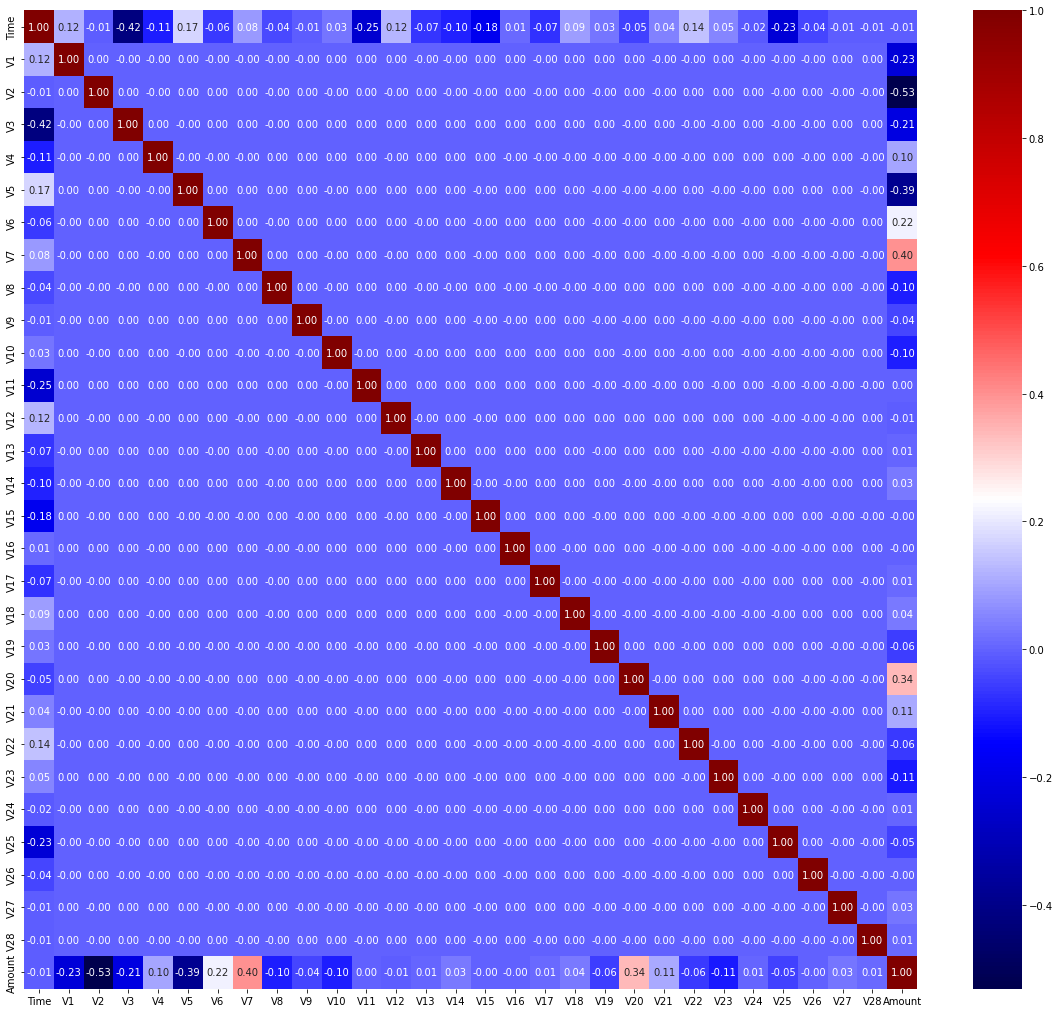

In [17]:
# Feature Correlation

df2 = df.drop(columns='Class').copy()

fig, ax = plt.subplots(figsize=(20, 18))
sns.heatmap(df2.corr(), cmap='seismic', annot=True, fmt='.2f');

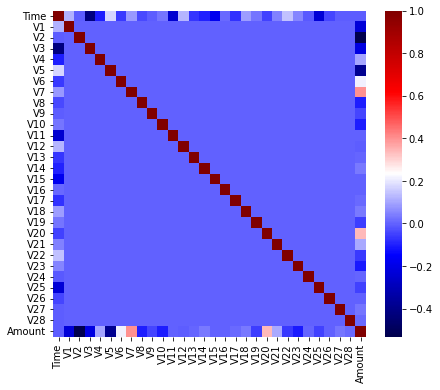

In [221]:
# Feature Correlation

df2 = df.drop(columns='Class').copy()

fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(df2.corr(), cmap='seismic', annot=False);

A more simpler, easier on the eyes view of the feature correlation matrix:

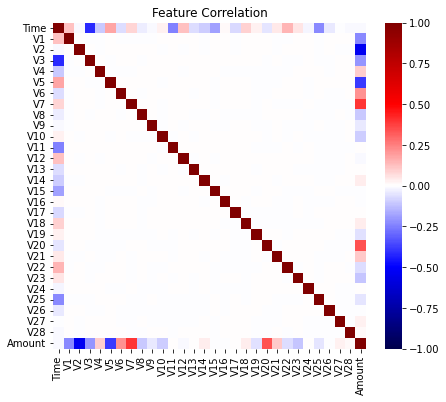

In [242]:
# Feature Correlation

df2 = df.drop(columns='Class').copy()

fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(df2.corr(), cmap='seismic', annot=False, vmin=-1, vmax=1)
plt.title('Feature Correlation');

Potential class separability was examined by further **Data Visualization** as shown below.  Class separation is shown based on the first few combinations of the variable features.

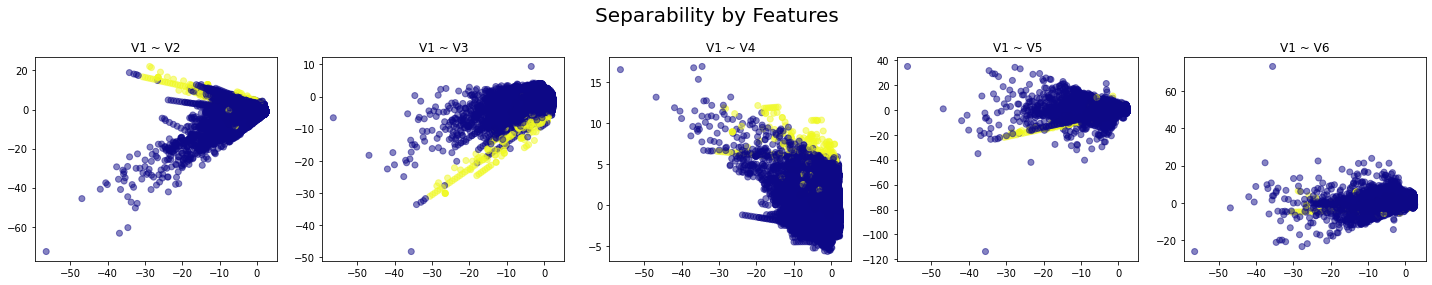

In [19]:
# Separability by Features

n = 5
fig, ax = plt.subplots(1, n, figsize=(20, 4))
for j in range(n):
    ax[j].scatter(x=df.iloc[:, 1], y=df.iloc[:, j+2], c=df.Class, alpha=0.5, cmap='plasma')
    ax[j].set_title('V1 ~ ' + df.columns[j+2])
fig.suptitle('Separability by Features', fontsize=20)
plt.tight_layout();

# just shows pairs of V1 with V2-6 - due to time/space constratints not showing all pairs (28 x 28)

# alternatively, could use t-SNE

Further Exploratory Data Analysis was perormed on 'Time'.  The following visualization demonstrates the **distibution of normal and fraudulent transactions by time**.  Of note, time is recorded in 1 second increments and the time of day is not explicitly stated.

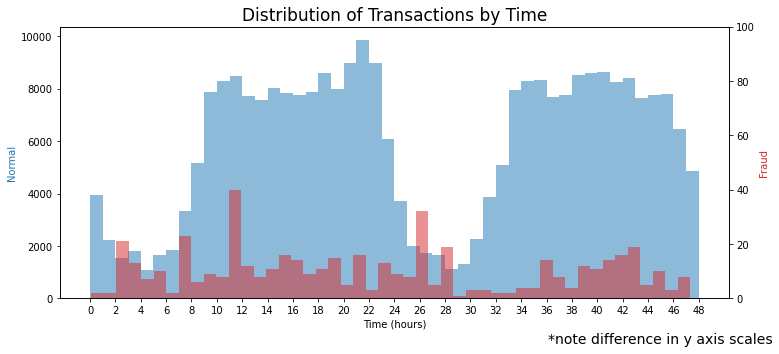

In [226]:
# Visualization - Distribution of Transactions by Time

fig, ax = plt.subplots(figsize=(12,5))
ax.hist(df[df['Class'] == 0]['Time'], bins=48, alpha=0.5, color='tab:blue', label='Normal')
ax.set_ylabel('Normal', color='tab:blue')

ax2 = ax.twinx()
ax2.hist(df[df['Class'] == 1]['Time'], bins=48, alpha=0.5, color='tab:red', label='Fraud')
ax2.set_ylim([0, 100])
ax2.set_ylabel('Fraud', color='tab:red')

ax.set_xlabel('Time (hours)')
ax.set_xticks(np.linspace(0, 172800, 25))
ax.set_xticklabels(np.linspace(0, (172800/3600), 25).astype(int))

plt.title('Distribution of Transactions by Time', fontsize=17)
fig.text(0.95, 0.01, '*note difference in y axis scales', ha='right', va='center', fontsize=14);

The distribution of valid and fraudulent transactions *generally* appears to be similar.  In order to use 'Time' as a meaningful variable, further manipulation and feature engineering would be required.  For simplicity's sake, 'Time' was omitted and not used as a feature.

**Data Preparation**  

Time Series analysis was not performed, and variable 'Time' was dropped.  
Class / target information was separated from variable features.  
Features were scaled to a standard [0, 1] scale.

In [41]:
# Prep datasets

X = df.drop(columns=['Time', 'Class']).copy()
y = df.Class.copy()

# rescale

scaler = StandardScaler(copy=True)
X = scaler.fit_transform(X)

# Anomaly Detection with PCA

The **Reconstruction Matrix** is constructed from the inverse transform of the principal components as below:

In [44]:
# PCA Decomposition (and Reconstruction)

n = 29
model = PCA(n_components=n)
model.fit(X)

X_pca = model.transform(X)
X_recon = model.inverse_transform(X_pca)

The following helper functions are used for **Anomaly Scoring** and **Assessment** with Receiver-Operator Curves and Precision-Recall Curves

In [45]:
# Anomaly Scoring Function

def AnomalyScore(A, B):
    '''
    given two matrices A and B of m (observations) x n (features) dimensions
    calculate the anomaly score of each observation in A with respect to B
    return a vector of length m with values in range [0,1] where closer to 0 is normal and closer to 1 is anomalous
    '''
    loss = np.sum((A - B)**2, axis=1)
    loss = (loss - np.min(loss)) / (np.max(loss) - np.min(loss))
    return loss

In [46]:
# Assess Function - Prec-Recall Curve and ROC Curves

def assess(true, pred, title='Model Assessment'):
    '''
    takes arrays of true labels and predicted labels
    plots performance assessment of Precision-Recall Curve and ROC Curve
    '''

    # Precision - Recall Curve

    precision, recall, thresholds = precision_recall_curve(true, pred)
    avg_precision = average_precision_score(true, pred)

    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ax[0].step(recall, precision, where='post')
    ax[0].fill_between(recall, precision, color='lightgray')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_ylim([0.0, 1.05])
    ax[0].set_xlim([0.0, 1.0])
    ax[0].text(x=0.6, y=0.8, s=f'avg prec = {avg_precision:0.3f}', bbox=dict(boxstyle='square', fill=False))
    ax[0].set_title('Precision-Recall Curve');
    
    # ROC Curve

    FPR, TPR, thresholds = roc_curve(true, pred)
    auc = roc_auc_score(true, pred)

    ax[1].plot(FPR, TPR, color='red', label='ROC Curve')

    ax[1].plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
    ax[1].set_xlim([-0.01, 1.01])
    ax[1].set_ylim([0.0, 1.01])
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].text(x=0.6, y=0.2, s=f'AUC = {auc:0.3f}', bbox=dict(boxstyle='square', fill=False))
    ax[1].set_title('Receiver-Operator Curve')
    
    fig.suptitle(title)
    plt.tight_layout()

    plt.show()
    plt.close()

    return

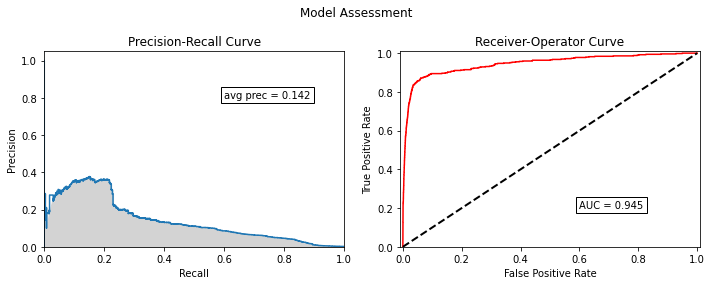

In [48]:
# make predictions with Anomaly Score [0,1]

pred = AnomalyScore(X, X_recon)
assess(y, pred)

Accuracy scores, ROC Curves, and AUC scores alone are less informative than also using Precision-Recall Curves.  The Precision-Recall Curves highlight the impact and importance of the threshold level in the classification of an observation as 'valid' or 'fraudulent'.  Each individual point on the Precision-Recall Curve represent a specific threshold level which results in the associated precision and recall scores.

**Experimentation** with a range of n_components from 2 to 29 was performed in order to find the optimal number of pca components.  
For the sake of brevity, all PR and ROC Curves are not shown here - instead only 2 are shown as examples.  

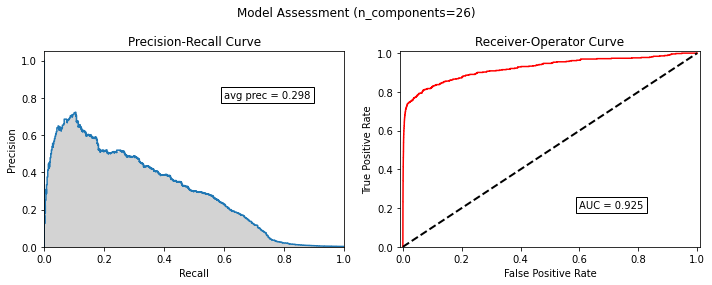

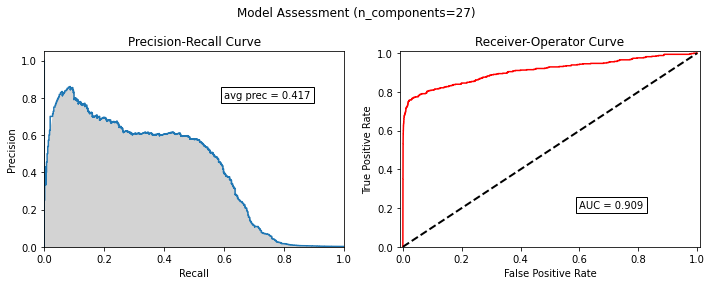

In [218]:

# models = np.arange(2, 30)  # can be used to show all models
models = [26, 27]
for n in models:
    model = PCA(n_components=n)
    model.fit(X)
    X_pca = model.transform(X)
    X_recon = model.inverse_transform(X_pca)
    pred = AnomalyScore(X, X_recon)
    assess(y, pred, title='Model Assessment (n_components=' + str(n) + ')')


While almost all models with n_components from 2 to 29 had very good, and similar ROC curves and AUC scores, there were significant differences in Precision-Recall Curves.  This demonstrates the impact of unbalanced classes on the ROC-AUC scoring and the importance of additional metrics to represent the model's ability to identify fraudulent cases (Recall) and its correctness with fraudulent predictions (Precision).  The F-Score is a more informative metric for model comparison as it is the harmonic mean of the precision recall.  The F-Score can also be adjusted by its $beta$ parameter to place more emphasis on either precision or recall depending on the desired task/application.  PR-AUC scores can also be used, but the actual shape and distribution of the PR Curve is more informative than just the PR-AUC.

In the analysis of all models, the model with n_components = 27 appeared to be optimal.  

The following visualization shows the **effect of threshold on precision and recall**.  As expected, at a lower threshold of anomaly score, more fraudulent transactions are identified as reflected in higher recall - at the expense of less accuracy with fraudulent predictions.  Similarly, at higher thresholds, recall is reduced and precision improved.  

Selection of an appropriate threshold for practical implementation is a subjective decision, not a machine learning problem.  An appropriate selection depends on the implications of the trade off between precision and recall.  For example, there is a trade off between the cost of missed fraudulent transactions and the ramifications of valid transactions flagged as fraudulent.

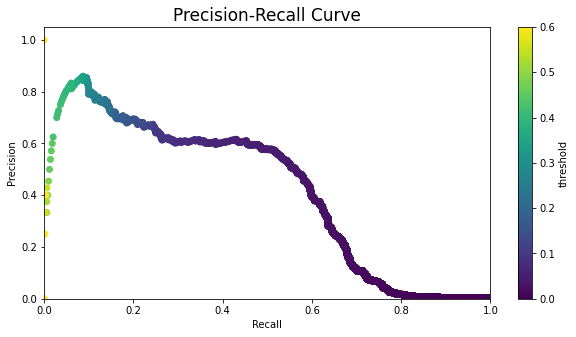

In [165]:
# Visualization of Precision-Recall Curve with thresholds

# note:  uses lasts iteratoin of modeling which is n=27
precision, recall, thresholds = precision_recall_curve(y, pred)
avg_precision = average_precision_score(y, pred)
thresholds = np.append([0], thresholds)

fig = plt.figure(figsize=(10, 5))
plt.scatter(recall, precision, c=thresholds, cmap='viridis', vmin=0.0, vmax=0.6, alpha=1)
plt.colorbar(label='threshold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
# plt.text(x=0.6, y=0.8, s=f'avg prec = {avg_precision:0.3f}', bbox=dict(boxstyle='square', fill=False))
plt.title('Precision-Recall Curve', fontsize=17);
# plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(avg_precision));

The F-Score can be used to compare models at different thresholds.  The F-beta-Score can be used to weight either precision or recall more than the other.  Specifically, $beta$ > 1 gives more weight to recall, while $beta$ < 1 favors precision. For example, $beta$ = 2 makes recall twice as important as precision, while $beta$ = 0.5 does the opposite.  

The following visualizations demonstrate the **effect of threshold value on performance metrics**.  In this scenario, a $beta$ = 2 is used for F-beta score to place more emphasis on identifying fraudulent transactions, i.e. recall.

In [193]:
from sklearn.metrics import f1_score, fbeta_score, precision_score, recall_score

results = pd.DataFrame(data=None, columns=['cutoff', 'f1', 'fbeta', 'precision', 'recall'])

cutoff = np.arange(0.05, 0.65, 0.05)
for c in cutoff:
    pred_class = (pred > c).astype(int)
    # print(f'cutoff = {c:0.2f}, f1 score = {f1_score(y, pred_class, average="macro"):0.3f}, fbeta score = {fbeta_score(y, pred_class, beta=2, average="macro"):0.3f}, precision = {precision_score(y, pred_class):0.3f}, recall = {recall_score(y, pred_class):0.3f}')
    result = pd.DataFrame(data=[[c, f1_score(y, pred_class, average="macro"), fbeta_score(y, pred_class, beta=2, average="macro"), precision_score(y, pred_class), recall_score(y, pred_class)]], columns=['cutoff', 'f1', 'fbeta', 'precision', 'recall'])
    results = pd.concat([results, result], ignore_index=True)

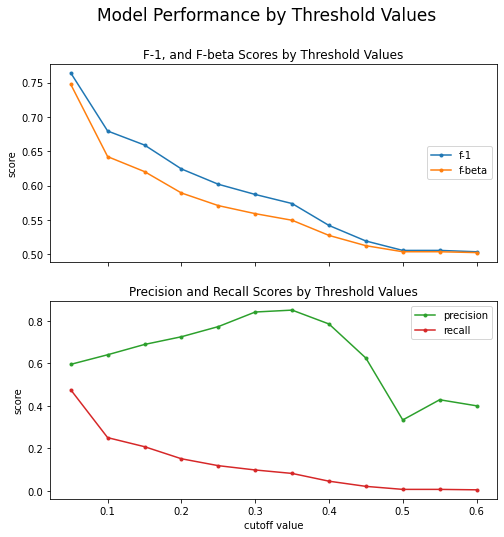

In [194]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 8))

ax[0].plot(results.cutoff, results.f1, '.-', label='f-1')
ax[0].plot(results.cutoff, results.fbeta, '.-', label='f-beta')
ax[0].set_ylabel('score')
ax[0].legend(loc='center right')
ax[0].set_title('F-1, and F-beta Scores by Threshold Values')
ax[1].plot(results.cutoff, results.precision, '.-', label='precision', color='tab:green')
ax[1].plot(results.cutoff, results.recall, '.-', label='recall', color='tab:red')
ax[1].set_xlabel('cutoff value')
ax[1].set_ylabel('score')
ax[1].set_title('Precision and Recall Scores by Threshold Values')
ax[1].legend()

fig.suptitle('Model Performance by Threshold Values', fontsize=17);

The appropriate selection of a cutoff threshold value is a subjective and contextual decision based on the implications of its use in anomaly detection.  The **effect of cutoff values** is demonstrated by the resultant **confusion matrices**.  Given the class outcomes of the proposed cutoffs values and the associated cost/benefit value of these outcomes, then a final threshold value can be selected for implementation of anomaly detection.  The plot of Precision and Recall Scores by Threshold Values suggests potential values [0.05, 0.1, 0.15, 0.2].

Note that the sklearn convention for confustion matrix is as follows:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;TN | FP  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;FN | TP  
As the sklearn User Guide notes, "(Wikipedia and other references may use a different convention for axes)" such as:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;TP | FN  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;FP | TN  

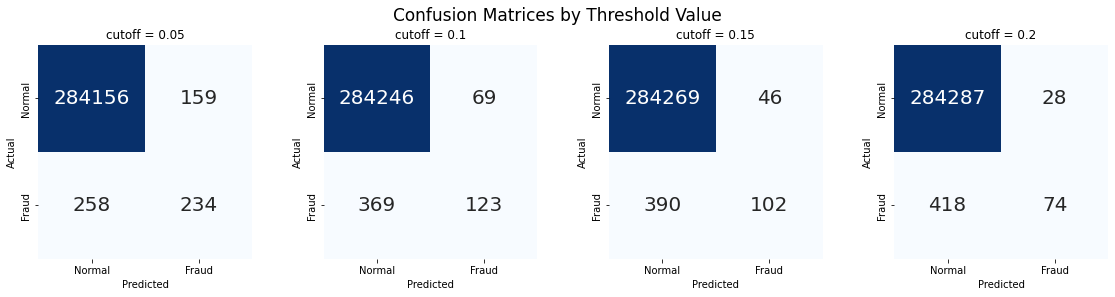

In [259]:
cutoff = [0.05, 0.1, 0.15, 0.2]

fig, ax = plt.subplots(1, 4, figsize=(16, 4))
for i in range(4):
    pred_class = pred > cutoff[i]
    c_mat = confusion_matrix(y, pred_class)
    sns.heatmap(c_mat, annot=True, cmap='Blues', fmt='d', annot_kws={'size': 20}, ax=ax[i], square=True, cbar=False)
    ax[i].set_xticks([0.5, 1.5])
    ax[i].set_xticklabels(['Normal', 'Fraud'])
    ax[i].set_yticks([0.5, 1.5])
    ax[i].set_yticklabels(['Normal', 'Fraud'])
    ax[i].set_xlabel('Predicted')
    ax[i].set_ylabel('Actual')
    ax[i].set_title('cutoff = ' + str(cutoff[i]))

fig.suptitle('Confusion Matrices by Threshold Value', fontsize=17)
fig.tight_layout();

While the scoring metrics can be identified in the plots above, they are replicated below for more easier reference, noting that cutoff=0.05 had the best F-1 and F-beta scores suggesting the best balance between precision and recall performance.

In [202]:
results[(results.cutoff >= 0.05) & (results.cutoff <= 0.2)].style.highlight_max(color='lightgreen', subset=['f1', 'fbeta'])

,cutoff,f1,fbeta,precision,recall
0,0.050000,0.764040,0.747462,0.595420,0.475610
1,0.100000,0.679440,0.642134,0.640625,0.250000
2,0.150000,0.658992,0.620309,0.689189,0.207317
3,0.200000,0.624187,0.589186,0.725490,0.150407


**Results Discussion**  

A model using 27 PCA components was selected.  It's precision, recall, and F-score metrics were analyzed for various anomaly score thresholds, showing best performance at the cutoff value = 0.05 with the following metrics:  F-1=0.76, F-beta(2)=0.74, precision=0.59, recall=0.47.  Of the more than 284,000 transactions, this model correctly identified 47.5% (n=234) of the fraudulent transactions with only 159 valid transactions mislabeled as fraudulent.

Overall, the metrics results demonstrate good performance.  The F-Score is situation dependent, however an F-Score > 0.7 is generally considered good.  The F-score (or F-beta) is particularly helpful for model comparison within the same scenario, i.e. within the same specific task.  The F-Score provides an overall idea of performance for *both* precision and recall.  

The functional performance is rather impressive in the bigger picture of the volume of transactions.  Out of more than 284,000 transactions, only 0.17% (n=492) were fraudulent.  Almost one-half of the fraudulent transactions were correctly identified at the 0.05 threshold level (n=234) which is remarkable given that the number of valid transactions dwarfs the number of fraudulent transactions on the order of $10^3$.

# Comparison with other Unsupervised Learning techniques

The previous Unsupervised technique using PCA Analysis was compared with three other Unsupervised techniques:  Isolation Forest, Local Outlier Factor, and OneClassSVM; and one Supervised Learning technique:  Random Forest.  Results are shown below with each model.

### Comparison with Isolation Forest

Recall:  0.5914634146341463
Precision:  0.10214110214110214


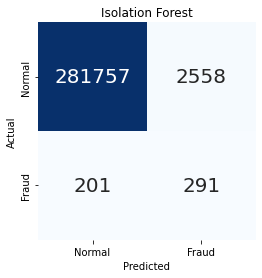

In [253]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
model.fit(X)
if_pred = model.predict(X)

if_class = np.where(if_pred == 1, 0, 1)
if_class = np.where(if_pred == -1, 1, if_class)

c_mat_if = confusion_matrix(y, if_class)
sns.heatmap(c_mat_if, annot=True, cmap='Blues', fmt='d', annot_kws={'size': 20}, square=True, cbar=False)
plt.xticks([0.5, 1.5], labels=['Normal', 'Fraud'])
plt.yticks([0.5, 1.5], labels=['Normal', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Isolation Forest');

TN, FP, FN, TP = c_mat_if.ravel()
print('Recall: ', TP / (TP + FN))
print('Precision: ', TP / (TP + FP))

In [250]:
print('Isolation Forest:', 'F1 Score =', f1_score(y, if_class, average='macro'), 'F-beta Score =', fbeta_score(y, if_class, beta=2, average='macro'))

Isolation Forest: F1 Score = 0.584663566616676 F-beta Score = 0.6473519948195758


### Comparison with LocalOutlierFactor

Recall:  0.12195121951219512
Precision:  0.002852931387000143


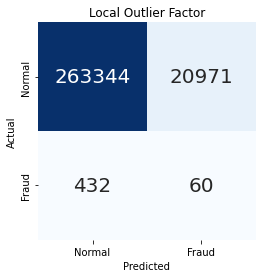

In [254]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')
lof_pred = lof.fit_predict(X)

lof_pred = np.where(lof_pred == 1, 0, 1)
lof_pred = np.where(lof_pred == -1, 1, lof_pred)

c_mat_lof = confusion_matrix(y, lof_pred)
sns.heatmap(c_mat_lof, annot=True, cmap='Blues', fmt='d', annot_kws={'size': 20}, square=True, cbar=False)
plt.xticks([0.5, 1.5], labels=['Normal', 'Fraud'])
plt.yticks([0.5, 1.5], labels=['Normal', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Local Outlier Factor');

TN, FP, FN, TP = c_mat_lof.ravel()
print('Recall: ', TP / (TP + FN))
print('Precision: ', TP / (TP + FP))

In [260]:
print('LocalOutlierFactor:', 'F1 Score =', f1_score(y, lof_pred, average='macro'), 'F-beta Score =', fbeta_score(y, lof_pred, beta=2, average='macro'))

LocalOutlierFactor: F1 Score = 0.48326267309282445 F-beta Score = 0.47643143259046045


### Comparison with OneClassSVM

Recall:  0.6280487804878049
Precision:  0.10830704521556257


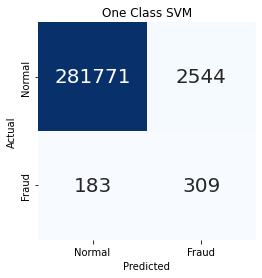

In [257]:
from sklearn.svm import OneClassSVM

model = OneClassSVM(kernel='rbf', nu=0.01, gamma=0.01)
model.fit(X)
svm_pred = model.predict(X)

svm_pred = np.where(svm_pred == 1, 0, 1)
svm_pred = np.where(svm_pred == -1, 1, svm_pred)

c_mat_svm = confusion_matrix(y, svm_pred)
sns.heatmap(c_mat_svm, annot=True, cmap='Blues', fmt='d', annot_kws={'size': 20}, square=True, cbar=False)
plt.xticks([0.5, 1.5], labels=['Normal', 'Fraud'])
plt.yticks([0.5, 1.5], labels=['Normal', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('One Class SVM');

TN, FP, FN, TP = c_mat_svm.ravel()
print('Recall: ', TP / (TP + FN))
print('Precision: ', TP / (TP + FP))

In [258]:
print('OneClassSVM:', 'F1 Score =', f1_score(y, svm_pred, average='macro'), 'F-beta Score =', fbeta_score(y, svm_pred, beta=2, average='macro'))

OneClassSVM: F1 Score = 0.5899688153882275 F-beta Score = 0.6565869101463577


# Comparison with Supervised Learning technique

In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
cv_auc = cross_val_score(rfc, X, y, cv=5, scoring='roc_auc', n_jobs=-1)
cv_prec = cross_val_score(rfc, X, y, cv=5, scoring='precision', n_jobs=-1)
cv_recall = cross_val_score(rfc, X, y, cv=5, scoring='recall', n_jobs=-1)

In [163]:
print('AUC: ', cv_auc.mean(), 'Precision:', cv_prec.mean(), 'Recall:', cv_recall.mean())

AUC:  0.9445241682249931 Precision: 0.8918484648458765 Recall: 0.7639868068439497


In [208]:
F1_RF = 2 * (cv_prec.mean() * cv_recall.mean()) / (cv_prec.mean() + cv_recall.mean())
Fbeta_RF = (1 + 2**2) * (cv_prec.mean() * cv_recall.mean()) / ((2**2 * cv_prec.mean()) + cv_recall.mean())
print('Random Forest:', 'F1 Score =', F1_RF, 'F-beta Score =', Fbeta_RF)

Random Forest: F1 Score = 0.8229809721965063 F-beta Score = 0.7865395740427161


# Conclusion and Discussion

The PCA application in anomaly detection was compared with other Unsupervised (and Supervised) Learning techniques.  It performed better than the other Unsupervised techniques tested:  Isolation Forest (F1-Score=0.58), Local Outlier Factor (F1-Score=0.48), and OneClassSVM (F1-Score=0.59).  One Supervised technique was tested, Random Forest.  Random Forest performed better than the Unsupervised PCA technique (RF F1-Score=0.82).  However, the Random Forest performance was not extraordinarily better than the Unsupervised technique (with the caveat and understanding that the RF model was not tuned/optimized, and RF was the only Supervised model tested for simple comparison) - and has the advantage of model training with knowledge of the class designations.  

This technique of PCA Analysis for Anomaly Detection shows significant potential in this task specific application and may also be beneficial in other same domain applications or other domains.  There are multiple different potential implementations which may also improve performance, such as online/offline analysis, initial screening, second layer testing with additional techniques, and analysis on the underlying data (which was not available here).